# HR Analytics & Tree Model Classification Project

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Context</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>Salifort Motors' HR department is focused on improving employee satisfaction levels within the company. They have collected data from employees to better understand the factors influencing job satisfaction and retention. They seek a data-driven analysis to identify key factors that are likely to contribute to employees leaving the company.

The goal of this project is to analyze the collected data and build a machine learning model that predicts whether an employee is likely to leave the company. By accurately predicting potential departures, the company can identify factors influencing employee turnover and develop targeted initiatives to enhance employee retention and satisfaction.
    </p>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Data Dictionary</h2>

<table>
    <tr>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>satisfaction_leve</td>
        <td>Employee-reported job satisfaction level. [0&ndash;1]</td>
    </tr>
    <tr>
        <td>last_evaluation</td>
        <td>Score of employee's last performance review. [0&ndash;1]</td>
    </tr>
    <tr>
        <td>number_project</td>
        <td>Number of projects employee contributes to.</td>
    </tr>
    <tr>
        <td>average_monthly_hours</td>
        <td>Average number of hours employee worked per month.</td>
    </tr>
    <tr>
        <td>time_spend_company</td>
        <td>How long the employee has been with the company (years).</td>
    </tr>
    <tr>
        <td>Work_accident</td>
        <td>Whether or not the employee experienced an accident while at work.</td>
    </tr>
    <tr>
        <td>left</td>
        <td>Whether or not the employee left the company.</td>
    </tr>
    <tr>
        <td>promotion_last_5years</td>
        <td>Whether or not the employee was promoted in the last 5 years.</td>
    </tr>
    <tr>
        <td>Department</td>
        <td>The employee's department.</td>
    </tr>
    <tr>
        <td>salary</td>
        <td>The employee's salary (U.S. dollars).</td>
    </tr>
</table>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>In this project, we will embark a data-driven analysis & building tree models to identify key factors for solving a simulated scenario regarding employee turnover. We will be using the <a href="https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv" download>HR Data Analytics Dataset</a>. For novices like me, this project will provide a fundamental understanding and hands-on practice in Process of Exploeratory Data Analysis, Logistics Regression and supervised machine learning Tree models to solve a simulated scenario of a real world employee turnover problem.
    </p>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Import Packages</h2>
</script>

In [1]:
# Import Operational packages
import pandas as pd
import numpy as np

# Import Viz packages
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Load Dataset</h2>
</script>

In [2]:
# Load athe datas
data = pd.read_csv('HR_capstone_dataset.csv')
Hr_df = pd.DataFrame(data)

In [3]:
# Display the first 5 rows
Hr_df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Exploratory Data Analysis (Data Cleaning)</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>Data Cleaning is a crucial step in the Exploratory Data Analysis (EDA) process. It involves preparing raw data for analysis by identifying and correcting errors or inconsistencies. This step ensures that the dataset is accurate, consistent, and complete, which is essential for obtaining reliable insights and making informed decisions.</p>
    <p><strong>For this part of the project we will:</strong></p>
    <ul style="list-style-position: inside; padding-left: 20px;">
        <li style="margin-bottom: 10px;">EDA - Data Types & Missing Data</li>
        <li style="margin-bottom: 10px;">EDA - Rename Columns</li>
        <li style="margin-bottom: 10px;">EDA - Duplicates Values</li>
        <li style="margin-bottom: 10px;">EDA - Outliers</li>
    </ul>
</div>

## EDA - Data Types & Missing Data

In [4]:
# Gather basic information about the dataset
Hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Insight:**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="list-style-position: inside;">
        <li style="margin-bottom: 10px;">There are no missing values in the datase.</li>
        <li style="margin-bottom: 10px;">There are a few mispelled column header.</li>
    </ul>
</div>

## EDA - Rename Columns

In [5]:
# Rename columns 
Hr_df = Hr_df.rename(columns={'Work_accident':'work_accident', 
                              'Department':'department', 
                              'average_montly_hours':'average_monthly_hours', 
                              'time_spend_company':'tenure'})

# Display all column names after the update
Hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## EDA - Duplicates Values

In [6]:
# Check for Duplicates values percentage
print('Duplicated Data Percentage: ', '%.2f'%  (Hr_df.duplicated().sum() / len(Hr_df) * 100), '%')

# Check for Duplicates values count
print('Duplicated Data Count: ', Hr_df.duplicated().sum())

Duplicated Data Percentage:  20.05 %
Duplicated Data Count:  3008


In [7]:
# Inspect some rows containing duplicates as needed
mask_duplicated = Hr_df.duplicated()

# Apply the Duplicates mask and return a sub-dataset of onlt duplicates.
Hr_df[mask_duplicated].head(10)

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

In [8]:
# Drop duplicates and save resulting dataframe in a new variable as needed
Hr_df = Hr_df.drop_duplicates(keep='first').reset_index(drop=True)

# Check if there they duplicates are removed
Hr_df.duplicated().sum()

0

## EDA - Outliers

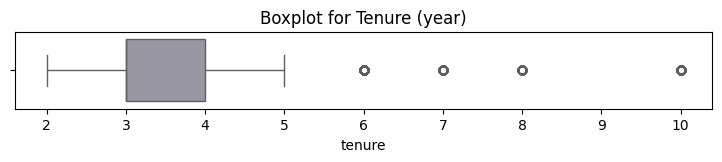

In [9]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(9,1))
sns.boxplot(x=Hr_df['tenure'], showfliers=True, color='#9896A4')
plt.title('Boxplot for Tenure (year)')
plt.show()

In [10]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
q1 = Hr_df['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
q3 = Hr_df['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = q3 - q1 

# Define the Lower & Upper Limit for Non-outliers in `tenure`
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr 
print('Lower Limit: ', '%.2f'% lower_limit)
print('Upper Limit: ', '%.2f'% upper_limit, '\n')

# Boolean Mask for filtering any outliers below or above the limits
Mask = (Hr_df['tenure'] < lower_limit) | (Hr_df['tenure'] > upper_limit)

# Apply the Boolean Mask filter
Hr_df_outliers = Hr_df[Mask]

# Count how many outliers counts
print('Number of Outliers: ', Hr_df_outliers.any(axis=1).sum())

Lower Limit:  1.50
Upper Limit:  5.50 

Number of Outliers:  824


<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Exploratory Data Analysis (Visualizations)</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>Data Visualization is a vital component of Exploratory Data Analysis (EDA). It involves the graphical representation of data to uncover patterns, trends, and insights that might not be immediately apparent from raw data. Effective data visualization allows analysts to quickly understand complex datasets, identify relationships, and communicate findings in an accessible and compelling manner.</p>

<strong>For This Project Here are the Plots:</strong>
    <ul style="list-style-type: none; padding-left: 0; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 1:</strong> Average Monthly Hours by Number of Projects</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 2:</strong> Average Monthly Hours vs. Satisfaction Levels</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 3:</strong> Satisfaction Levels by Tenure</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 4:</strong> Salary Levels for Different Tenures</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 5:</strong> Last Evaluation Score by Average Monthly Hours</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 6:</strong> Promotions Last 5 Years by Monthly Hours (Stayed vs. Left)</li>
        <li style="margin-bottom: 10px;"><strong>EDA - Visualization 7:</strong> Number of Stay/Left by Department</li>
    </ul>
</div>

## EDA - Visualization 1
**`Box & Bar charts:` Average Monthly Hours by Number of Projects (Stayed V. Left)**

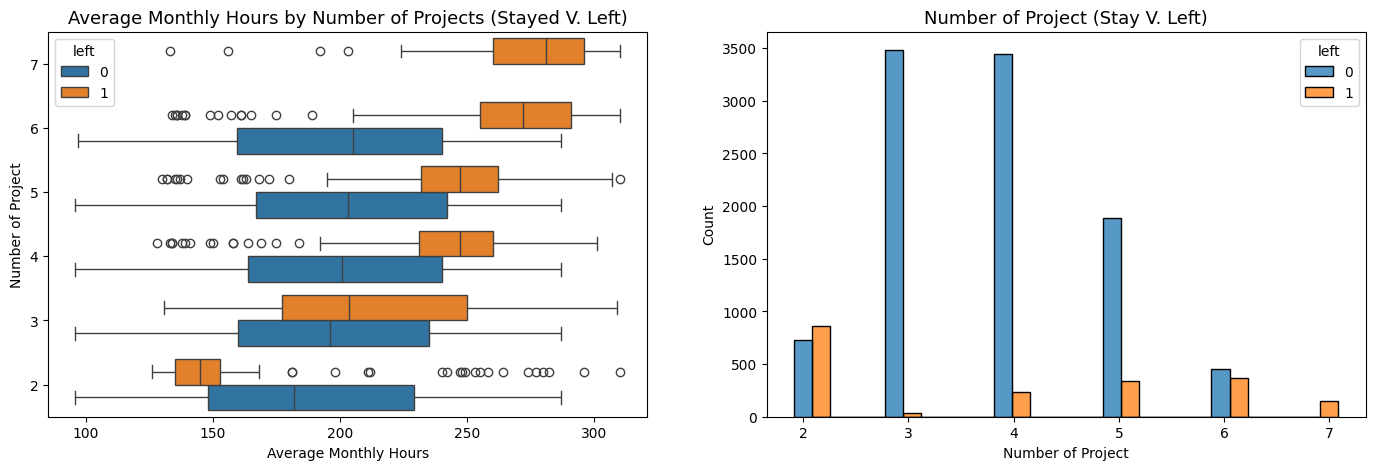

In [11]:
fig, axes = plt.subplots(1,2, figsize=(17,5))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who `stayed` versus those who `left`
sns.boxplot(data=Hr_df, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=axes[0])
axes[0].invert_yaxis()

axes[0].set_title('Average Monthly Hours by Number of Projects (Stayed V. Left)', fontsize=13)
axes[0].set_xlabel('Average Monthly Hours')
axes[0].set_ylabel('Number of Project')


# Create histogram showing distribution of `number_project`, comparing employees who `stayed` versus those who `left`
sns.histplot(data=Hr_df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=axes[1])

axes[1].set_title('Number of Project (Stay V. Left)', fontsize=13)
axes[1].set_xlabel('Number of Project')


# show the 2 plots
plt.show()

In [12]:
# Get value counts of stayed/left for employees with 7 projects
mask = Hr_df['number_project'] == 7

Hr_df[mask]['left'].value_counts()

left
1    145
Name: count, dtype: int64

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;"><strong>Two groups of employees left the company:</strong>
            <code>Group 1: those who worked significantly less than their peers with the same number of projects</code>. This group might include employees who were fired or had given notice and were assigned fewer hours. <code>Group 2: those who worked much more</code>. This group likely includes employees who quit, possibly being the largest contributors to their projects.
        </li>
        <li style="margin-bottom: 10px;">Everyone with Seven Projects left the company. The average monthly hours for 7-projects are 255-295 hours/month. The Number of <code>Stayed = 0</code> is not there and that confirms that everyone <code>Left = 1</code> had left the company.</li>
        <li style="margin-bottom: 10px;">Assuming the standard monthly working hour without overtime is 160 hours/month. People who worked 4 or more projects and left had an average of 230+ hours/month. They are working <code>230/4 weeks</code> = 57hr.30min hrs/week, and in terms of days, they are working <code>57.30/5 days</code> = 11hr.30min hrs/day. This means that, aside from the employees who worked on 4 or more projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.</li>
    </ul>
</div>

## EDA - Visualization 2 
**`Scatterplot:` The average monthly hours versus the satisfaction levels**

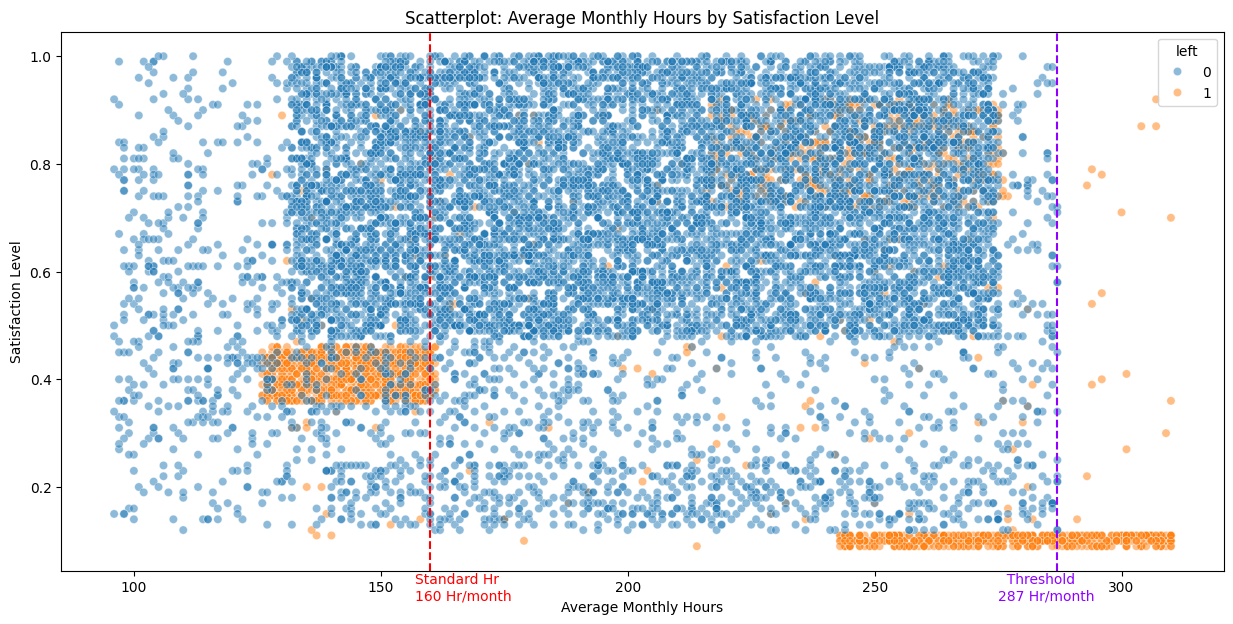

In [13]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(15,7))
sns.scatterplot(data=Hr_df, x='average_monthly_hours', y='satisfaction_level', alpha=0.5, hue='left')

# add Vertical Line representing Standard Working Monthly Hour = 160 
plt.axvline(x=160, color='#FF0000', ls='--')
plt.text(x=157, y=-0.01, s='Standard Hr \n160 Hr/month' , color='#FF0000' )

# Vertical Purple dash Line represents: Threshould = 287 Hours/Month where everyone left the company
plt.axvline(x=Hr_df[Hr_df['left']==0]['average_monthly_hours'].max(), ls='--', color='#8F00FF')
plt.text(x=275, y=-0.01,  s='  Threshold \n287 Hr/month', color='#8F00FF')


# Edits the Title, X, and Y Axis 
plt.title('Scatterplot: Average Monthly Hours by Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')


plt.show()

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week. It's likely this is related to their low <code>satisfaction_level</code> being close to zero.</li>
        <li style="margin-bottom: 10px;">The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.</li>
        <li style="margin-bottom: 10px;">Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.</li>
    </ul>
    <p><strong>Note:</strong> The strange shape of the distributions here is indicative of data manipulation or synthetic data.</p>
</div>


## EDA - Visualization 3
**`Box & Bar Chart:` satisfaction levels by tenure**

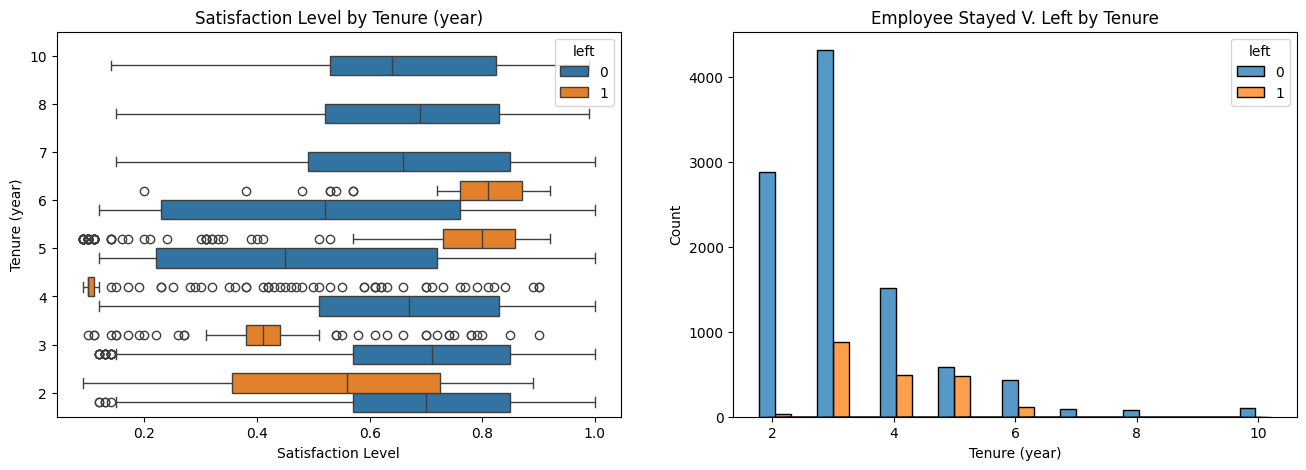

In [14]:
fig, axes = plt.subplots(1,2, figsize=(16,5))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=Hr_df, x='satisfaction_level', y='tenure', hue='left',  orient='h', ax=axes[0])
axes[0].invert_yaxis()

axes[0].set_title('Satisfaction Level by Tenure (year)')
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Tenure (year)')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=Hr_df, x='tenure', hue='left', multiple='dodge', shrink=6, ax=axes[1])
axes[1].set_title('Employee Stayed V. Left by Tenure')
axes[1].set_xlabel('Tenure (year)')

plt.show()

In [15]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
Hr_df.groupby(['left']).agg({'satisfaction_level':['mean','median']})

satisfaction_level       
                   mean median
left                          
0              0.667365   0.69
1              0.440271   0.41

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.</li>
        <li style="margin-bottom: 10px;">Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.</li>
        <li style="margin-bottom: 10px;">The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.</li>
        <li style="margin-bottom: 10px;">The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.</li>
        <li style="margin-bottom: 10px;">As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.</li>
        <li style="margin-bottom: 10px;">The <code>mean</code> and <code>median</code> <code>satisfaction scores of employees who left are lower than those who stayed</code>. Interestingly, for employees who stayed, the mean satisfaction score is slightly below the median, indicating a left-skewed distribution of satisfaction levels.</li>
    </ul>
</div>

## EDA - Visualization 4
**`Bar Chart:` Salary levels for different tenures**

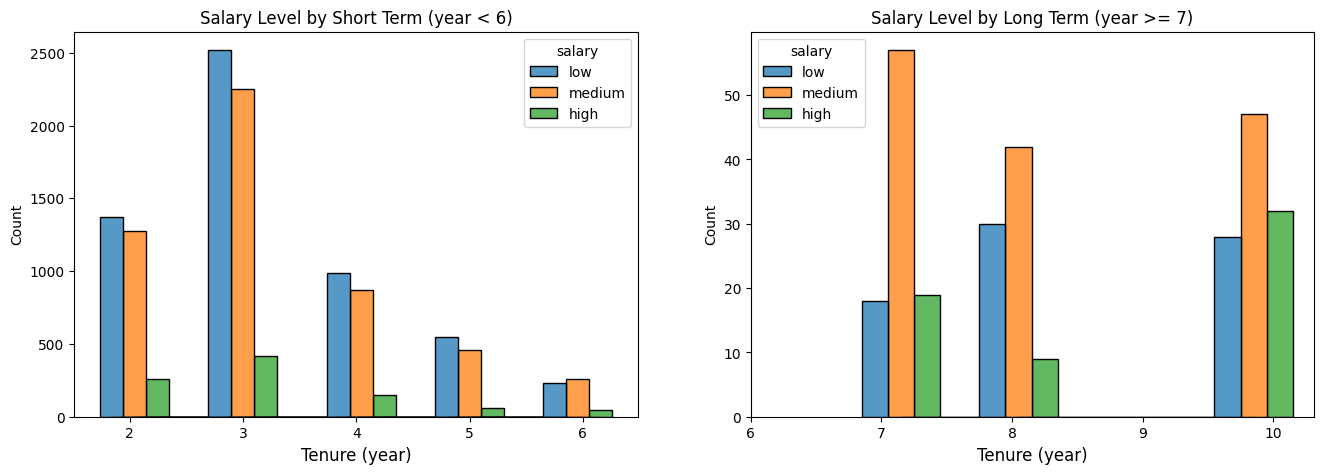

In [16]:
fig, axes = plt.subplots(1,2, figsize=(16,5))


# Boolean Mask filter data with `tenure` les than 7 years
tenure_short = Hr_df['tenure'] < 7

# Plot long-tenured histogram
sns.histplot(data=Hr_df[tenure_short], x='tenure', hue='salary', hue_order=['low','medium','high'], multiple='dodge', shrink=7, ax=axes[0])
plt.xticks(range(1,7,1))

axes[0].set_title('Salary Level by Short Term (year < 6)')
axes[0].set_xlabel('Tenure (year)', fontsize=12)



# Plot short-tenured histogram
tenure_long = Hr_df['tenure'] >= 7
sns.histplot(data=Hr_df[tenure_long], x='tenure', hue='salary', hue_order=['low','medium','high'], multiple='dodge', shrink=2, ax=axes[1])
plt.xticks(range(6,11,1))

axes[1].set_title('Salary Level by Long Term (year >= 7)')
axes[1].set_xlabel('Tenure (year)', fontsize=12)


plt.show()

**Insight:**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="list-style-position: inside;">
        <li style="margin-bottom: 10px;">Majority of the salary level before 6 years are in the low level. After the 6 years, most employees' salary levels increase to the medium level.</li>
        <li style="margin-bottom: 10px;">The right plot shows that long-term tenured employees were not mostly higher-paid.</li>
    </ul>
</div>

## EDA - Visualization 5
**`Scatterplot:` Last Evaluation Score by Average Monthly Hours**

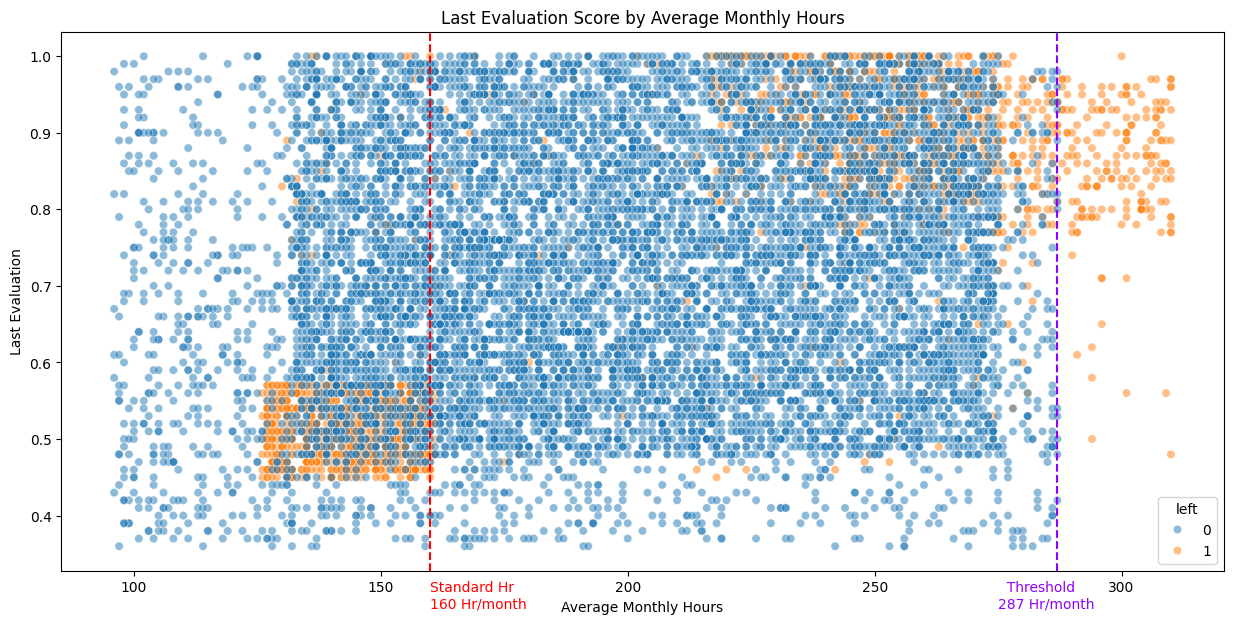

In [17]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(15,7))
sns.scatterplot(data=Hr_df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)

# Red dash line represents: Standard Monthly Hour w/o Overtime 160 Hr/Month
plt.axvline(x=160, ls='--', color='#FF0000')
plt.text(x=160, y=0.28, s='Standard Hr \n160 Hr/month', color='#FF0000')

# Purple dash Line represents: Threshould = 287 Hours/Month where everyone left the company
plt.axvline(x=Hr_df[Hr_df['left']==0]['average_monthly_hours'].max(), ls='--', color='#8F00FF')
plt.text(x=275, y=0.28,  s='  Threshold \n287 Hr/month', color='#8F00FF')

plt.title('Last Evaluation Score by Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')

plt.show()

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">The scatterplot indicates two groups of employees who left: overworked employees who performed very well, and employees who worked slightly under the nominal monthly average of 160 hours with lower evaluation scores.</li>
        <li style="margin-bottom: 10px;">There seems to be a correlation between hours worked and evaluation score.</li>
        <li style="margin-bottom: 10px;">There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.</li>
        <li style="margin-bottom: 10px;">Most of the employees in this company worked over 160 hours per month. Everyone left the company when the average monthly hours were above 287 hours/month.</li>
    </ul>
</div>

## EDA - Visualization 6
**`Scatterplot:` Promotions last 5 years by Monthly Hours (Stayed V. Left)**

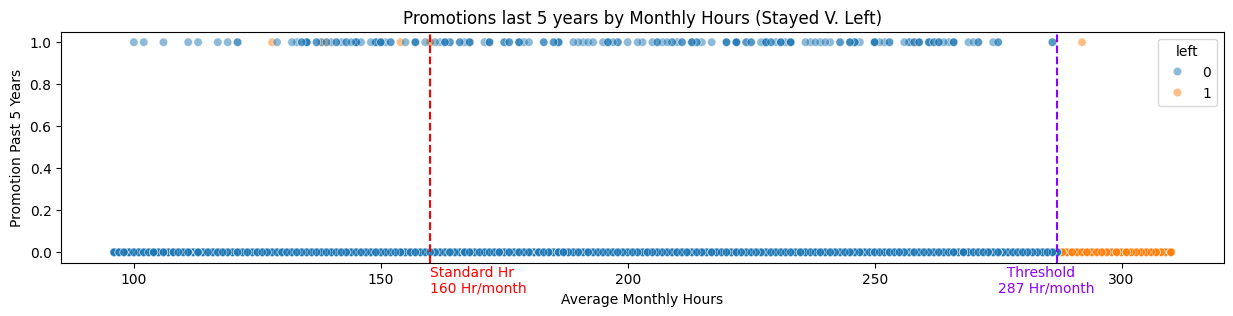

In [18]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(15,3))
sns.scatterplot(data=Hr_df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)


# Red dash line represents: Standard Monthly Hour w/o Overtime 160 Hr/Month
plt.axvline(x=160, ls='--', color='#FF0000')
plt.text(x=160, y=-0.19, s='Standard Hr \n160 Hr/month', color='#FF0000')

# Purple dash Line represents: Threshould = 287 Hours/Month where everyone left the company
plt.axvline(x=Hr_df[Hr_df['left']==0]['average_monthly_hours'].max(), ls='--', color='#8F00FF')
plt.text(x=275, y=-0.19,  s='  Threshold \n287 Hr/month', color='#8F00FF')



plt.title('Promotions last 5 years by Monthly Hours (Stayed V. Left)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion Past 5 Years')

plt.show()

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">Very few employees who were promoted in the last five years left.</li>
        <li style="margin-bottom: 10px;">Very few employees who worked the most hours were promoted.</li>
        <li style="margin-bottom: 10px;">All of the employees who left were working the longest hours.</li>
    </ul>
</div>


## EDA - Visualization 7
**`Barplot:` Number of Stay/Left by Department**

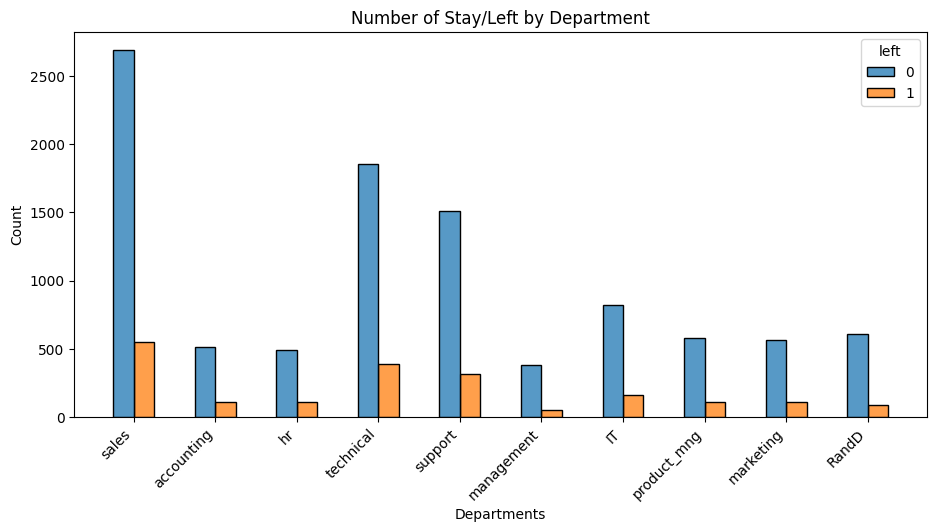

In [19]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,5))
sns.histplot(data=Hr_df, x='department', shrink=0.5, hue='left', multiple='dodge')

plt.title('Number of Stay/Left by Department')
plt.xlabel('Departments')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 15px;">
        <li>There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.</li>
    </ul>
</div>


<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Exploratory Data Analysis (Data Transformation)</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>Data transformation is a fundamental part of EDA, involving processes such as cleaning, normalization, encoding, and feature engineering. These transformations are essential for preparing raw data into a format suitable for analysis, ensuring accuracy and relevance in subsequent modeling or insights extraction.</p>
    <p><strong>For this part of the project we will:</strong></p>
    <ul style="list-style-position: inside; padding-left: 20px;">
        <li style="margin-bottom: 10px;">EDA - Label Encoding</li>
        <li style="margin-bottom: 10px;">EDA - Correlation HeatMap</li>
    </ul>
</div>

## EDA - Label Encoding

In [20]:
# Drop the `department` column
Hr_encoded = Hr_df.drop(columns='department')

# Ordinal Encoding
Hr_encoded['salary'] = Hr_encoded['salary'].map({'low':1, 'medium':2, 'high':3})

Hr_encoded.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  
0       3              0     1                      0       1  
1       6              0     1                      0       2  
2       4              0     1                      0       2  
3       5              0     1                      0       1  
4       3              0     1                      0       1

## EDA - Correlation HeatMap

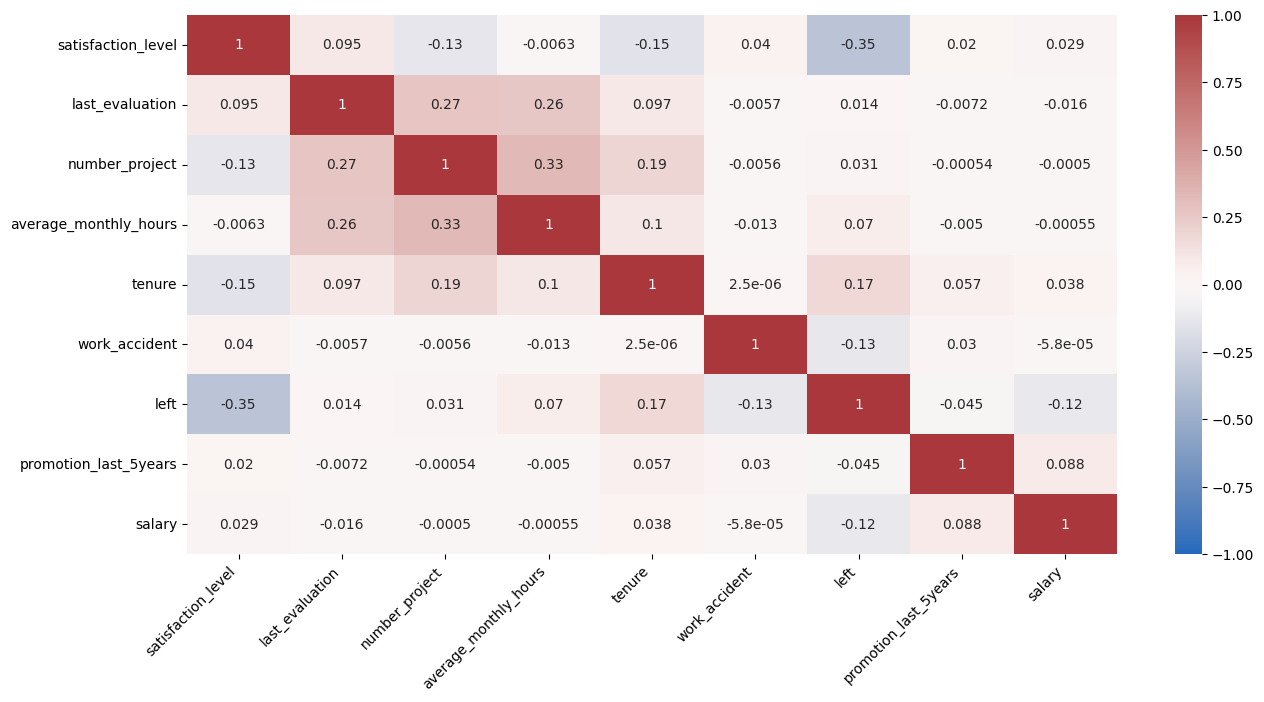

In [21]:
# Plot a correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(data=Hr_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Insight**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;"><code>left</code> & <code>salary</code> have a weak negative correlation relationship. This makes sense because the lower the salary, the more likely the person is to leave.</li>
        <li style="margin-bottom: 10px;"><code>left</code> & <code>satisfaction_level</code> also have a negative correlation. The lower the <code>satisfaction_level</code>, the more likely the person is to leave.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Modeling Approach: Logistic Regression </h2>
</script>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p><strong>Logistic Regression</strong> is a statistical method used for binary classification tasks, predicting the probability of a binary outcome (such as 0 or 1, true or false, yes or no). It models the relationship between one or more independent variables and a binary dependent variable using a logistic (sigmoid) function to map predicted values to probabilities.

In our case, we're using the Logistic Regression to predict whether an employee will stay=0 or leave=1 the company based on selected features of the employee. This approach allows us to understand how various factors influence employee retention and make informed decisions to improve it.</p>
    
<p><strong>Logistic Regression Assumptions:</strong></p>
    <ul style="list-style-position: inside; padding-left: 20px;">
        <li>Outcome variable is Binary: ( Left = 1 , Stay = 0 ).</li>
        <li>Observations are independent of each other.</li>
        <li>No severe multicollinearity among X variables.</li>
        <li>No extreme outliers.</li>
    </ul>
</div>

In [22]:
# Logistic Regression Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 1. (Logistic) Label Encoding & Dummies Encoding 

In [23]:
# Make a copy of the original Dataset
Hr_logistic = Hr_df.copy()

# Make `salary` column into ordinal encoding
Hr_logistic['salary'] = Hr_logistic['salary'].map({'low':1, 'medium':2, 'high':3})

# Dummie Encode the department column 
Hr_logistic = pd.get_dummies(Hr_logistic, columns=['department'], drop_first=True, dtype=int)

# Display first 5 rows
Hr_logistic.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       1   
1       6              0     1                      0       2   
2       4              0     1                      0       2   
3       5              0     1                      0       1   
4       3              0     1                      0       1   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

## 2. (Logistic) Feature Selection

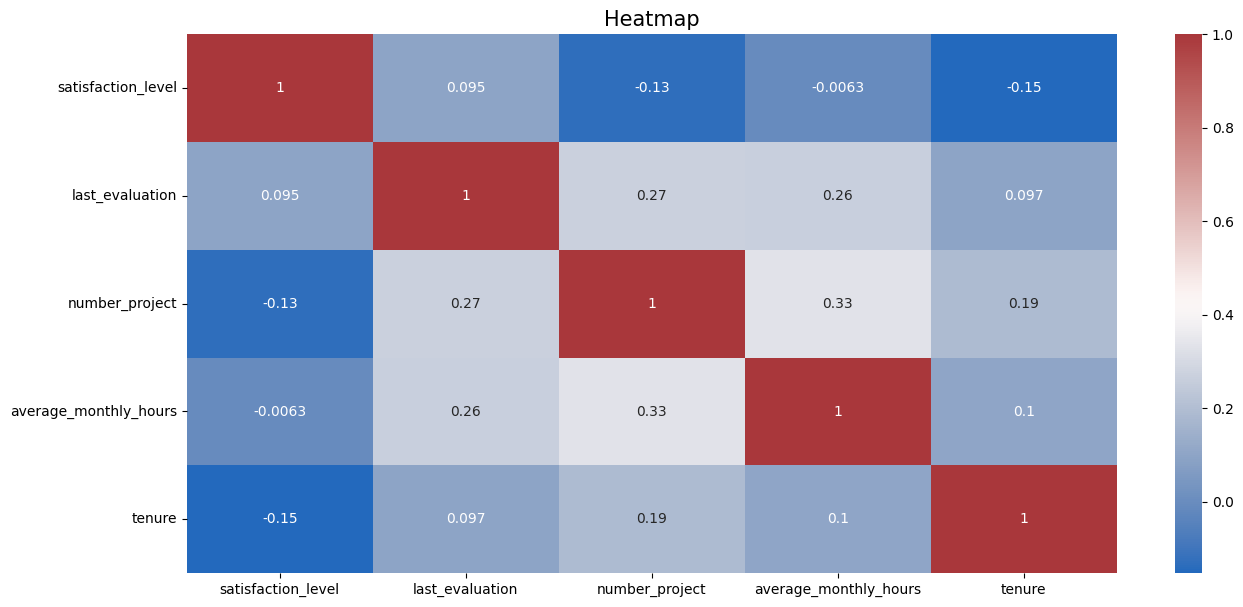

In [24]:
# Select a list of features for heatmap
features_corr = Hr_logistic[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr()

# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(15,7))
sns.heatmap(features_corr, annot=True, cmap='vlag')
plt.title('Heatmap', fontsize=15)
plt.show()

## 3. (Logistic) Remove Outliers
Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column.

In [25]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
Mask = (Hr_logistic['tenure'] > lower_limit) & (Hr_logistic['tenure'] < upper_limit)
Hr_logistic_no_outliers = Hr_logistic[Mask]

# display the new dataframe
Hr_logistic_no_outliers.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       1   
2       4              0     1                      0       2   
3       5              0     1                      0       1   
4       3              0     1                      0       1   
5       3              0     1                      0       1   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

## 4. (Logistic) Check Dependent Variable's Class Imbalance

In [26]:
# Check Class Balance
Hr_logistic_no_outliers['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

**Insight**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">There is an approximately 83% - 17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we can use this data without modifying the class balance and continue evaluating the model.</li>
    </ul>
</div>


## 5. (Logistic) Split the Data

In [27]:
# Split the target variable & features
X = Hr_logistic_no_outliers.drop(columns=['left'])
y = Hr_logistic_no_outliers['left']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

## 6. (Logistic) Fit the Model

In [28]:
# Logistics Regression
log_clf = LogisticRegression(random_state=42, max_iter=500)

# fit the train data into the model
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

## 7. (Logistic) Confusion Matrix

In [29]:
# packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)


def make_cm(model_name, model_object, X_tt, y_tt): 
    '''
    model_name     (str): Name of the model use for confusion matrix title.
    model_object (model): The model object itself.
    X_tt       (numeric): X_test
    y_tt       (numeric): y_test
    '''

    # get the y_pred 
    y_pred = model_object.predict(X_tt)

    # confusion matrix
    cm = confusion_matrix(y_tt, y_pred, labels=model_object.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_object.classes_ , )
    disp.plot(cmap='cividis')
    plt.title(model_name)

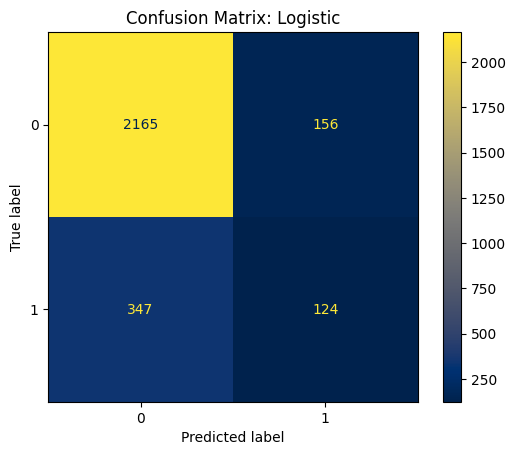

In [30]:
# us `make_cm` to create the confusion matrix
make_cm('Confusion Matrix: Logistic', log_clf, X_test, y_test)

**Insights**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>
        <strong>Logistic Regression's Confusion Matrix Explanation:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><strong>Top left (True Negative)</strong>: The number of people who didn't leave that the model accurately predicted as did not leave.</li>
        <li style="margin-bottom: 10px;"><strong>Top right (False Positive)</strong>: The number of people who didn't leave that the model inaccurately predicted as left.</li>
        <li style="margin-bottom: 10px;"><strong>Bottom left (False Negative)</strong>: The number of people who left that the model inaccurately predicted as didn't leave.</li>
        <li><strong>Bottom right (True Positive)</strong>: The number of people who left that the model accurately predicted as left.</li>
    </ul>
</div>

## 8. (Logistic) Get Performance Scores

In [31]:
# Import the score metrics packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [32]:
# Calculate the model performance scores.
accuracy_s = accuracy_score(y_test, y_pred)
precision_s = precision_score(y_test, y_pred)
recall_s = recall_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)
auc_s = roc_auc_score(y_test, y_pred)

In [33]:
# DataFrame the scores stored in a dictionary 
logistic_results = pd.DataFrame({'Model Name':'Logistics Regression (Test)',
                                 'Accuracy':accuracy_s, 
                                 'Precision':precision_s, 
                                 'Recall':recall_s, 
                                 'F1':f1_s, 
                                 'AUC':auc_s}, index=[0])
logistic_results

Model Name  Accuracy  Precision   Recall        F1  \
0  Logistics Regression (Test)  0.819842   0.442857  0.26327  0.330226   

        AUC  
0  0.598029

In [34]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test,y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



**Insight**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower. We will try another approach using Tree-Based Model.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Modeling Approach: Tree-based Model</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>
        <strong>Tree-based models</strong> A type of <strong>Supervised Machine Learning</strong> that performs Classification & Regression Tasks. In tree-based learning a split is determined by which variables/features and cut-off values offer the most predictive power.
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><strong>Decision Trees</strong>: A decision tree splits the data from an Root Node into Dicision Nodes based on feature values, leading to a tree structure where each Leaf Node represents a class label (in classification) or a continuous value (in regression).         </li>
        <li style="margin-bottom: 10px;"><strong>Random Forest</strong>: Is an ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. Each tree in the forest is trained on a random subset of the data and features.</li>
    </ul>
</div>

In [35]:
# Make a copy of the original dataset
Hr_dtree = Hr_df.copy()

# Make `salaary` column into ordinal encoding
Hr_dtree['salary'] = Hr_dtree['salary'].map({'low':1, 'medium':2, 'high':3})

# Dummie Encode the department column 
Hr_dtree = pd.get_dummies(Hr_dtree, columns=['department'], drop_first=True, dtype=int)

# Display first 5 rows
Hr_dtree.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       1   
1       6              0     1                      0       2   
2       4              0     1                      0       2   
3       5              0     1                      0       1   
4       3              0     1                      0       1   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [36]:
# Features Selection
X = Hr_dtree.drop(columns=['left'])

# Target Variable
y = Hr_dtree['left']

# Split the data into X_train & y_train
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Decision Tree - Round 1 (All Features)</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
<p>For <strong>Decision Tree - Round 1</strong>, we will instantiate a single Decision Tree model that includes <strong>all features</strong> and use it to predict whether an employee stays or leaves the company. This process involves several key steps to ensure the model is properly trained and evaluated.



<strong>Steps for Decision Tree - Round 1 (All Features):</strong></p>
         
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;"><strong>Model Instantiation</strong>: We will start by instantiating the decision tree classifier using DecisionTreeClassifier from scikit-learn.</li>
        <li style="margin-bottom: 10px;"><strong>Cross-Validation and Hyperparameter Tuning</strong>: Next, we will define the parameters for cross-validation and specify the metric scores to be used in GridSearchCV. This step is crucial for identifying the best hyperparameters that optimize the model's performance.</li>
        <li style="margin-bottom: 10px;"><strong>Model Training</strong>: We will fit the decision tree model using the training dataset (x_tr , y_tr). During this process, we will set the refit parameter of GridSearchCV to roc_auc to ensure the model is refitted using the parameters that provide the best area under the ROC curve.</li>
        <li style="margin-bottom: 10px;"><strong>Evaluation and Selection of Best Model</strong>: Finally, we will find the best parameters and corresponding metrics by identifying the model with the highest roc_auc score. This model will provide the most accurate predictions on whether an employee stays or leaves based on all features.</li>
    </ul>
</div>

In [37]:
# Import the decision tree packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# Insantiate the decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameter for GridSearchCV
cv_params = {'max_depth':[4,6,8,None], 
             'min_samples_leaf':[2,5,1], 
             'min_samples_split':[2,4,6]}

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Insantiate GridSeachCV
tree_clf1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [39]:
%%time

# Fit the model with train dataset
tree_clf1.fit(X_tr, y_tr)

CPU times: total: 7.36 s
Wall time: 7.43 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [40]:
# Decision Tree best params
tree_clf1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [41]:
# Decision Tree Best Roc_Auc score
tree_clf1.best_score_

0.9702777979021447

In [42]:
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Get the index of the df with the max(refit= metric) score
    best_estimator_index = cv_results['mean_test_roc_auc'].idxmax()
    best_estimator_result = cv_results.loc[best_estimator_index]

    # Extract Accuracy, precision, recall, and f1 score from that row
    accuracy = best_estimator_result['mean_test_accuracy']
    precision = best_estimator_result['mean_test_precision']
    recall = best_estimator_result['mean_test_recall']
    f1 = best_estimator_result['mean_test_f1']
    roc_auc = best_estimator_result['mean_test_roc_auc']

    # Create table of results
    Table = pd.DataFrame({'Model Name':model_name,
                          'Accuracy':accuracy, 
                          'Precision':precision, 
                          'Recall':recall, 
                          'F1':f1, 
                          'AUC':roc_auc}, index=[0])
    return Table

In [43]:
# Save the scores with the best `Roc_Auc` score
decision_tree_scores_1 = make_results('Decision Tree 1 CV', tree_clf1)
decision_tree_scores_1

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Decision Tree 1 CV  0.973868   0.922105  0.920501  0.921269  0.970278

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Random Forest - Round 1 (All Features)</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
<p>Similar to Dicion Tree -Round 1, for <strong>Random Forest - Round 1</strong>, we will instantiate an esemble learning that include multiple decision tree that includes <strong>all features</strong> and use it to predict whether an employee stays or leaves the company.



<strong>Steps for Random Forest - Round 1 (All Features):</strong></p>
         
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;"><strong>Model Instantiation</strong>: We will start by instantiating the random forest classifier using RandomForestClassifier from scikit-learn.ensemble.</li>
        <li style="margin-bottom: 10px;"><strong>Cross-Validation and Hyperparameter Tuning</strong>: Next, we will define the parameters for cross-validation and specify the metric scores to be used in GridSearchCV, since we are including all features we need to set <code>max_features':[1.0]</code>. This step is crucial because it tells the random forest model to include all the features for each tree we're buidling.</li>
        <li style="margin-bottom: 10px;"><strong>Model Training</strong>: We will fit the decision tree model using the training dataset (x_tr , y_tr). During this process, we will set the refit parameter of GridSearchCV to roc_auc to ensure the model is refitted using the parameters that provide the best area under the ROC curve.</li>
        <li style="margin-bottom: 10px;"><strong>Evaluation and Selection of Best Model</strong>: Finally, we will find the best parameters and corresponding metrics by identifying the model with the highest roc_auc score. This model will provide the most accurate predictions on whether an employee stays or leaves based on all features.</li>
    </ul>
</div>

In [44]:
# Import the Random Forest Package
from sklearn.ensemble import RandomForestClassifier 

In [45]:
# insantiate the random forest model
rf = RandomForestClassifier(random_state=0)

# assign cv-param for GridSearchCV
cv_params = {'max_depth':[3,5,None], 
             'max_features':[1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf':[1,2,3], 
             'min_samples_split':[2,3,4], 
             'n_estimators': [300,500]}

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# GridSearch 
rf_clf1 = GridSearchCV(rf, 
                      cv_params, 
                      scoring=scoring, 
                      cv=4, 
                      refit='roc_auc')

In [46]:
%%time
# Fit the model
#rf_clf1.fit(X_tr, y_tr)

CPU times: total: 0 ns
Wall time: 0 ns


In [47]:
import pickle
path = 'D:\\Jupyter\\'

# Read in pickled model
#with open (path + 'Hr_rf_clf1.pickle', 'wb') as to_write:
    #pickle.dump(rf_clf1, to_write)

In [48]:
# Read pickled model
with open (path + 'Hr_rf_clf1.pickle', 'rb') as to_read:
    rf_clf1 = pickle.load(to_read)

In [49]:
# Best param
rf_clf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [50]:
# Best scores
rf_clf1.best_score_

0.979517793442831

In [51]:
rf_cv_scores_1 = make_results('Random Forest 1 CV', rf_clf1)
rf_cv_scores_1

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Random Forest 1 CV  0.977759   0.941226  0.923857  0.932416  0.979518

In [52]:
def get_scores(model_name, model_object, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    y_pred = model_object.predict(X_test_data)

    accuracy = accuracy_score(y_test_data,y_pred)
    precision = precision_score(y_test_data,y_pred)
    recall = recall_score(y_test_data,y_pred)
    f1 = f1_score(y_test_data,y_pred)
    roc_auc = roc_auc_score(y_test_data,y_pred)

    table = pd.DataFrame({'Model Name':model_name, 
                          'Accuracy':accuracy, 
                          'Precision':precision, 
                          'Recall':recall, 
                          'F1':f1, 
                          'AUC':roc_auc}, index=[0])
    return table

In [53]:
rf_test_scores_1 = get_scores('Random Forest 1 (Test)', rf_clf1, X_test, y_test)
rf_test_scores_1

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Random Forest 1 (Test)  0.979992   0.958115  0.919598  0.938462  0.955801

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Decision Tree - Round 2 (W/ Feature Engineering)</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
<p>For <strong>Decision Tree - Round 2</strong>, we will instantiate a single Decision Tree model that only includes <strong>selective features</strong> and use it to predict whether an employee stays or leaves the company. 


<strong>Steps for Decision Tree - Round 2 (W/ Feature Engineering):</strong></p>
         
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;"><strong>Feature Engineering</strong>: For Decision Tree - Round 2 we will start with Feature Engineering & Feature selection. we will create a new column called <code>overworked</code> any one who worked more than 175 monthly_average_hours will classified as overworked = 1. To avoid high correlations we will drop the <code>average_monthly_hours</code> column.</li>
        <li style="margin-bottom: 10px;"><strong>Splite the data</strong>: We will split the dataset into X_train, y_train, X_test, y_test. Then further split the X_test & y_test into x_tr, y_tr test sets and x_val, y_val validation sets. The X_test & y_test will never be used througout the model developing process.</li>
        <li style="margin-bottom: 10px;"><strong>Model Instantiation</strong>: The we will instantiating the decision tree classifier using DecisionTreeClassifier from scikit-learn.</li>
        <li style="margin-bottom: 10px;"><strong>Cross-Validation and Hyperparameter Tuning</strong>: Next, we will define the parameters for cross-validation and specify the metric scores to be used in GridSearchCV. This step is crucial for identifying the best hyperparameters that optimize the model's performance.</li>
        <li style="margin-bottom: 10px;"><strong>Model Training</strong>: We will fit the decision tree model using the training dataset (x_tr , y_tr). During this process, we will set the refit parameter of GridSearchCV to roc_auc to ensure the model is refitted using the parameters that provide the best area under the ROC curve.</li>
        <li style="margin-bottom: 10px;"><strong>Evaluation and Selection of Best Model</strong>: Finally, we will find the best parameters and corresponding metrics by identifying the model with the highest roc_auc score. This model will provide the most accurate predictions on whether an employee stays or leaves based on all features.</li>
    </ul>
</div>

In [54]:
Hr_dtree2= Hr_df.copy()

# Make `salaary` column into ordinal encoding
Hr_dtree2['salary'] = Hr_dtree2['salary'].map({'low':1, 'medium':2, 'high':3})

# Dummie Encode the department column 
Hr_dtree2 = pd.get_dummies(Hr_dtree2, columns=['department'], drop_first=True, dtype=int)

# Drop `satisfaction_level` and save resulting dataframe in new variable
Hr_dtree2  = Hr_dtree2.drop(columns=['satisfaction_level'], axis=1) 

# Create `overworked` column. For now, it's identical to average monthly hours.
Hr_dtree2['overworked'] = Hr_dtree2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours worked:', Hr_dtree2['overworked'].max())
print('Min hours worked:', Hr_dtree2['overworked'].min())

Max hours worked: 310
Min hours worked: 96


In [55]:
# Define `overworked` as working > 175 hrs/month
Hr_dtree2['overworked'] = (Hr_dtree2['overworked'] > 175).astype(int)

In [56]:
# Drop the `average_monthly_hours` column
Hr_dtree2 = Hr_dtree2.drop(columns=['average_monthly_hours'])

# Display first few rows of resulting dataframe
Hr_dtree2.head(2)

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   

   promotion_last_5years  salary  department_RandD  department_accounting  \
0                      0       1                 0                      0   
1                      0       2                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   

   department_technical  overworked  
0                     0           0  
1                     0           1

In [57]:
# Isolate the outcome variable
X = Hr_dtree2.drop(columns=['left'], axis=1)

# Select the features
y = Hr_dtree2['left']

In [58]:
# Split the  test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Split the train & validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [59]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None], 
             'min_samples_leaf':[2, 5, 1], 
             'min_samples_split':[2, 4, 6]}

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree_clf2 = GridSearchCV(tree, 
                         cv_params, 
                         scoring=scoring, 
                         cv=4, 
                         refit='roc_auc')

In [60]:
%%time
# Fit the model
tree_clf2.fit(X_train, y_train)

CPU times: total: 7.22 s
Wall time: 7.28 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [61]:
# Find the best param for tree_clf2
tree_clf2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [62]:
# Find the best `ouc_auc` score for tree_clf2
tree_clf2.best_score_

0.9593135386038742

In [63]:
decision_tree_scores_2 = make_results('Decision Tree 2 CV ',tree_clf2)
decision_tree_scores_2

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Decision Tree 2 CV   0.951731   0.824575  0.902711  0.861388  0.959314

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Random Forest - Round 2 (W/ Feature Engineering)</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
<p>Again the steps are the same as  Random Forest -Round 1 for <strong>Random Forest - Round 2</strong>, we will use the updated splited data from Decision Tree - Round 2. The only difference between Random Forest - Round 1 & Random Forest - Round 2  is that we will instantiate an esemble learning that builds 300 & 500 decision trees with <strong>only the selected features</strong> and use it to predict whether an employee stays or leaves the company.



<strong>Steps for Random Forest - Round 2 (W/ Feature Engineering):</strong></p>
         
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;"><strong>Model Instantiation</strong>: We will start by instantiating the random forest classifier using RandomForestClassifier from scikit-learn.ensemble.</li>
        <li style="margin-bottom: 10px;"><strong>Cross-Validation and Hyperparameter Tuning</strong>: Next, we will define the parameters for cross-validation and specify the metric scores to be used in GridSearchCV, since we are including all features we need to set <code>max_features':[1.0]</code>. This step is crucial because it tells the random forest model to include all the features for each tree we're buidling.</li>
        <li style="margin-bottom: 10px;"><strong>Model Training</strong>: We will fit the decision tree model using the training dataset (x_tr , y_tr). During this process, we will set the refit parameter of GridSearchCV to roc_auc to ensure the model is refitted using the parameters that provide the best area under the ROC curve.</li>
        <li style="margin-bottom: 10px;"><strong>Evaluation and Selection of Best Model</strong>: Finally, we will find the best parameters and corresponding metrics by identifying the model with the highest roc_auc score. This model will provide the most accurate predictions on whether an employee stays or leaves based on all features.</li>
    </ul>
</div>

In [64]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3, 5, None], 
             'max_features':[1.0], 
             'max_samples':[0.7, 1.0], 
             'min_samples_leaf':[1, 2, 3], 
             'min_samples_split':[2, 3, 4], 
             'n_estimators': [300, 500]}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf_clf2 = GridSearchCV(rf, 
                       cv_params, 
                       scoring=scoring, 
                       cv=4, 
                       refit='roc_auc')

In [65]:
%%time
# Fit the model
#rf_clf2.fit(X_tr, y_tr)

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
import pickle
path = 'D:\\Jupyter\\'

# Read in pickled model
#with open (path + 'Hr_rf_clf2.pickle', 'wb') as to_write:
    #pickle.dump(rf_clf2, to_write)

In [67]:
# Read pickled model
with open (path + 'Hr_rf_clf2.pickle', 'rb') as to_read:
    rf_clf2 = pickle.load(to_read)

In [68]:
# Check best params
rf_clf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [69]:
# Check best AUC score on CV
rf_clf2.best_score_

0.9663840561741217

In [70]:
# Get performance metrics with the best roc_auc score 
rf_cv_scores_2 = make_results('Random Forest 2 CV ', rf_clf2)
rf_cv_scores_2

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Random Forest 2 CV   0.965527   0.909554  0.880342  0.894514  0.966384

In [71]:
# Get predictions on test data
rf_test_scores_2 = get_scores('Random Forest 2 (Test)', rf_clf2, X_test, y_test)
rf_test_scores_2

Model Name  Accuracy  Precision    Recall        F1       AUC
0  Random Forest 2 (Test)  0.964569   0.896203  0.889447  0.892812  0.934479

In [72]:
# Compare the metrics between the model using train data Vs unseen test data
pd.concat([rf_cv_scores_2,rf_test_scores_2]).reset_index(drop=True)

Model Name  Accuracy  Precision    Recall        F1       AUC
0     Random Forest 2 CV   0.965527   0.909554  0.880342  0.894514  0.966384
1  Random Forest 2 (Test)  0.964569   0.896203  0.889447  0.892812  0.934479

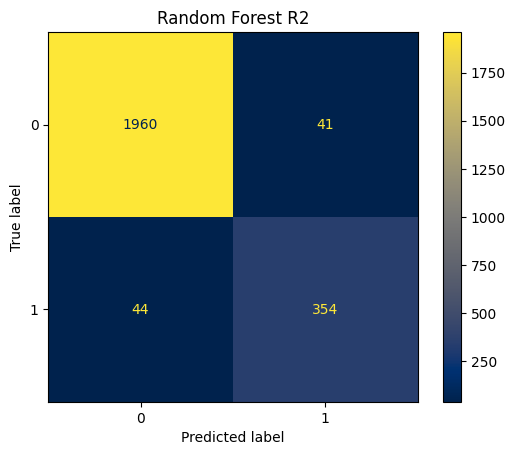

In [73]:
# Confusion Matrix
make_cm('Random Forest R2',rf_clf2, X_test, y_test)

**Insights**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>
        <strong>Random Forest - Round 2   Confusion Matrix Explanation:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><strong>Top left (True Negative)</strong>: 1960 The number of people who didn't leave that the model accurately predicted as did not leave.</li>
        <li style="margin-bottom: 10px;"><strong>Top right (False Positive)</strong>: 41 The number of people who didn't leave that the model inaccurately predicted as left.</li>
        <li style="margin-bottom: 10px;"><strong>Bottom left (False Negative)</strong>: 44 The number of people who left that the model inaccurately predicted as didn't leave.</li>
        <li><strong>Bottom right (True Positive)</strong>: 354 The number of people who left that the model accurately predicted as left.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Decision Tree - Round 2 Splits Plot</h2> 

In [74]:
# Recall both Decision Tree - Round 1 & 2 's scores with best AUC scores.
dt_model_scores_df = pd.concat([decision_tree_scores_1, decision_tree_scores_2]).reset_index(drop=True)
dt_model_scores_df

Model Name  Accuracy  Precision    Recall        F1       AUC
0   Decision Tree 1 CV  0.973868   0.922105  0.920501  0.921269  0.970278
1  Decision Tree 2 CV   0.951731   0.824575  0.902711  0.861388  0.959314

In [75]:
# Decision Tree - Round 2 Best parameters
tree_clf2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

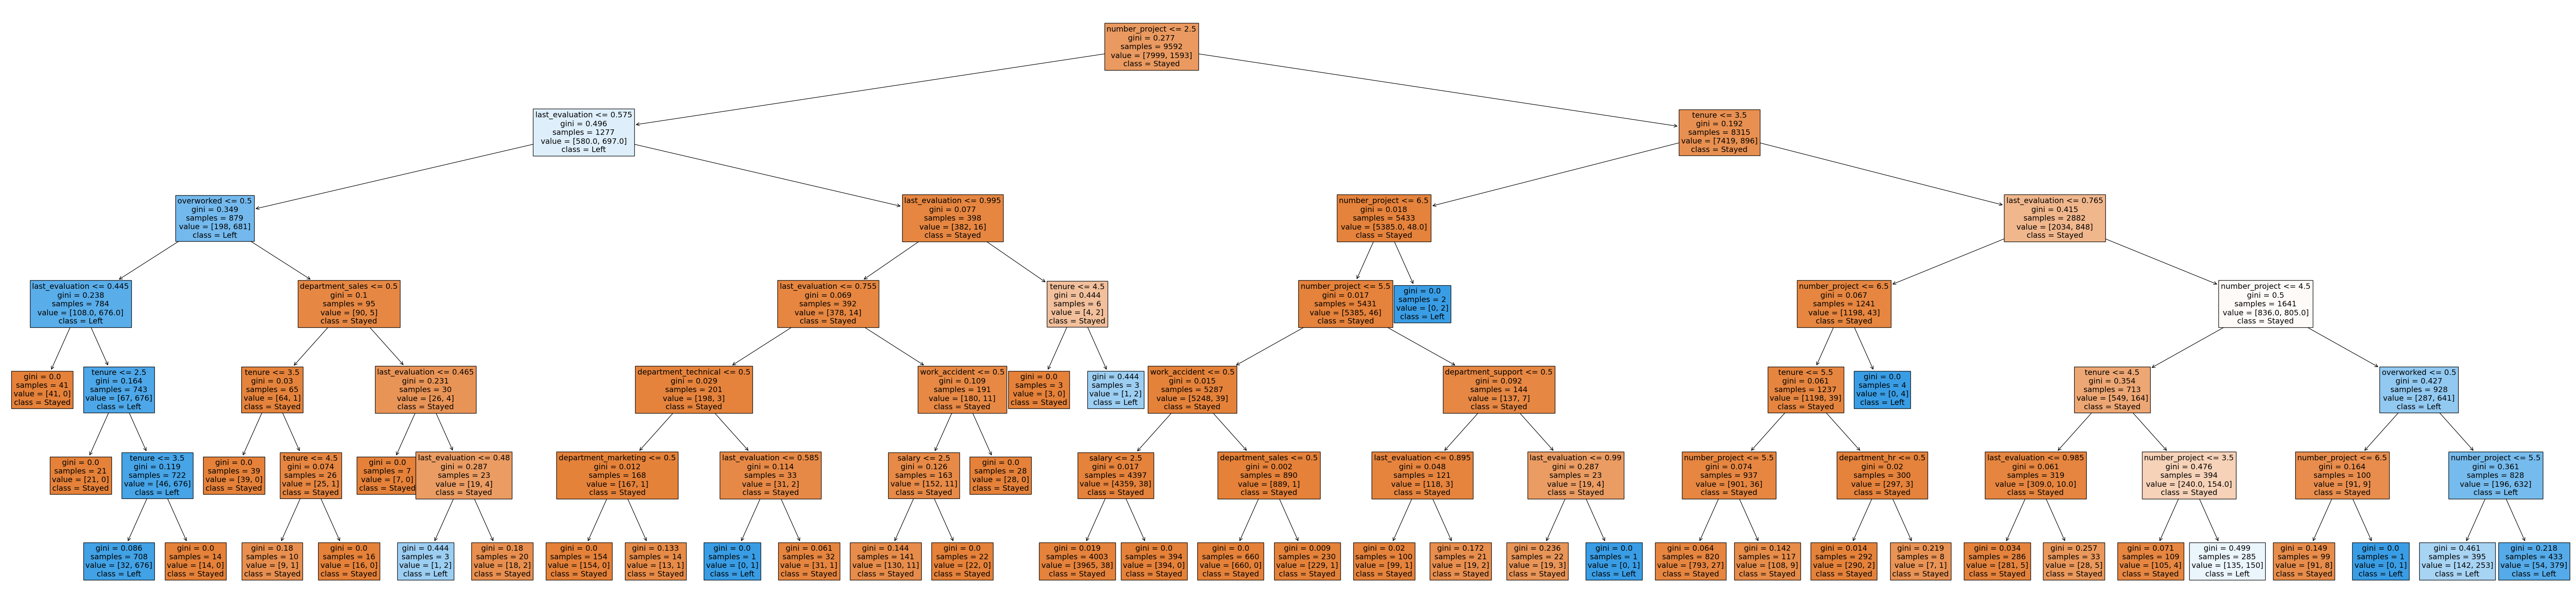

In [76]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_clf2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'Stayed', 1:'Left'}, filled=True)

plt.show()

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Decision Tree - Round 2 Feature Importance</h2> 

In [77]:
decision_tree_2_importances = pd.DataFrame(tree_clf2.best_estimator_.feature_importances_, columns=['gini_importance'], 
                                           index=X.columns)

decision_tree_2_importances = decision_tree_2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
Mask = decision_tree_2_importances['gini_importance']!= 0

decision_tree_2_importances = decision_tree_2_importances[Mask]
decision_tree_2_importances

gini_importance
number_project               0.345330
last_evaluation              0.340755
tenure                       0.213737
overworked                   0.098866
department_support           0.000443
department_sales             0.000297
work_accident                0.000155
salary                       0.000153
department_hr                0.000112
department_technical         0.000085
department_marketing         0.000067

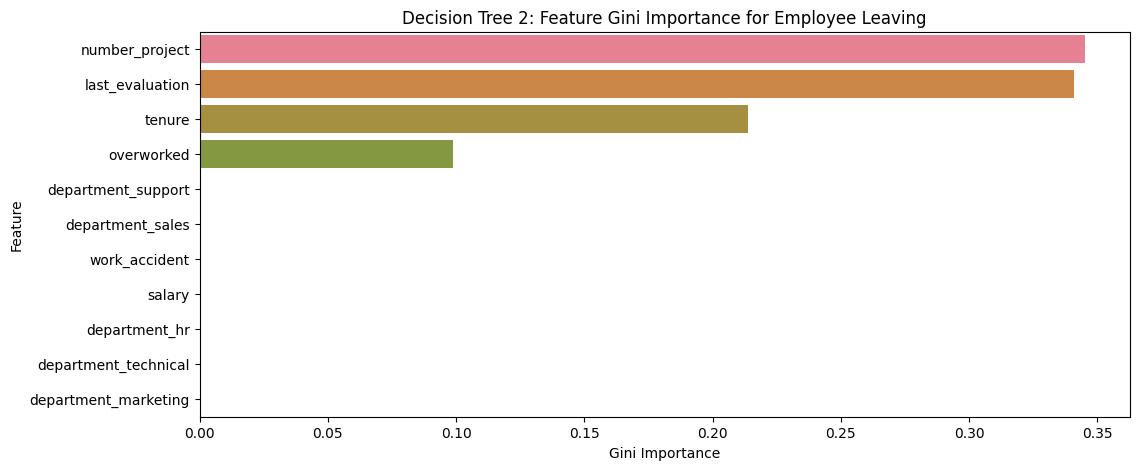

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(data=decision_tree_2_importances, x='gini_importance', y=decision_tree_2_importances.index, 
            hue=decision_tree_2_importances.index )

plt.title('Decision Tree 2: Feature Gini Importance for Employee Leaving')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.show()

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">     
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">
<strong>Decision Tree - Round 2</strong>, the top four features Gini Importance for predicting whether an employee might leave are the number of projects they are involved in, their last evaluation score, their tenure with the company, and whether they are overworked.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Random forest feature importance</h2> 

In [79]:
rf_model_score_results = pd.concat([rf_cv_scores_1, rf_cv_scores_2]).reset_index(drop=True)
rf_model_score_results

Model Name  Accuracy  Precision    Recall        F1       AUC
0   Random Forest 1 CV  0.977759   0.941226  0.923857  0.932416  0.979518
1  Random Forest 2 CV   0.965527   0.909554  0.880342  0.894514  0.966384

In [80]:
# Get feature importances
random_forest_2_importances = pd.DataFrame(rf_clf2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)

# Get indices of top 10 features
random_forest_2_importances = random_forest_2_importances.sort_values(by='gini_importance', ascending=False).head(10)
random_forest_2_importances 

gini_importance
last_evaluation              0.350911
number_project               0.319016
tenure                       0.197664
overworked                   0.090608
salary                       0.012052
work_accident                0.008578
department_technical         0.005251
department_sales             0.004697
department_support           0.003789
department_RandD             0.001635

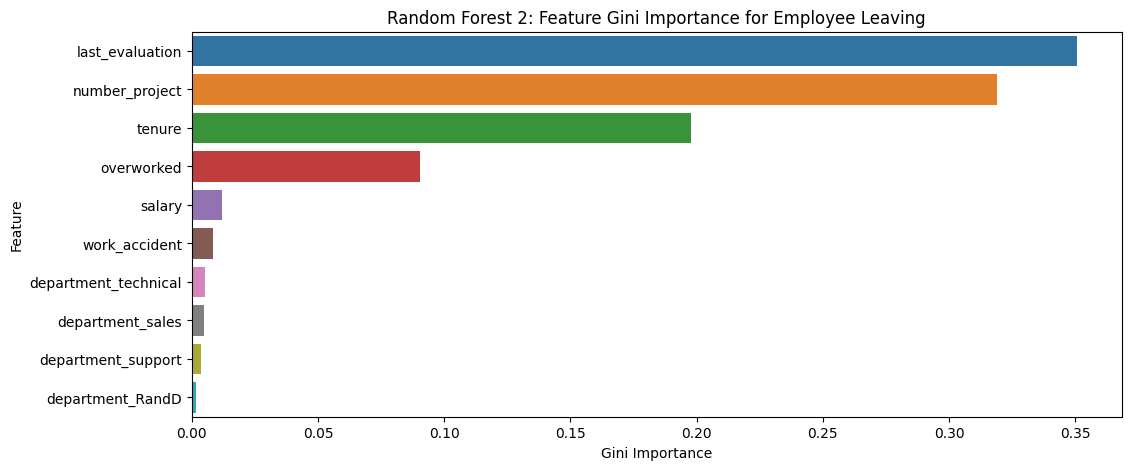

In [81]:
plt.figure(figsize=(12,5))
sns.barplot(data=random_forest_2_importances, x='gini_importance', y=random_forest_2_importances.index, hue=random_forest_2_importances.index)

plt.title('Random Forest 2: Feature Gini Importance for Employee Leaving')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.show()

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">     
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">
<strong>Random Forest - Round 2:</strong> the top five features for predicting whether an employee might leave are the number of projects they are involved in, their last evaluation score, their tenure with the company, whether they are overworked, and their salary level. These factors collectively provide insights into an employee's workload, performance, engagement, and financial satisfaction, helping Hr department identify potential retention risks.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Model Summary</h2> 

<table>
    <tr>
        <th>Model Name</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1</th>
        <th>AUC</th>
    </tr>
    </tr>
    <tr>
        <td>Logistics Regression (Test)</td>
        <td>0.819842</td>
        <td>0.442857</td>
        <td>0.26327</td>
        <td>0.330226</td>
        <td>0.598029</td>
    </tr>
    <tr>
        <td>Decision Tree 1 CV</td>
        <td>0.973868</td>
        <td>0.922105</td>
        <td>0.920501</td>
        <td>0.921269</td>
        <td>0.970278</td>
    </tr>
    <tr>
        <td>Decision Tree 2 CV</td>
        <td>0.965527</td>
        <td>0.824575</td>
        <td>0.902711</td>
        <td>0.861388</td>
        <td>0.959314</td>
    </tr>
    <tr style="color: #E4AD9D;">
    <td><strong>Random Forest 1 CV</strong></td>
    <td><strong>0.977759</strong></td>
    <td><strong>0.941226</strong></td>
    <td><strong>0.923857</strong></td>
    <td><strong>0.932416</strong></td>
    <td><strong>0.979518</strong></td>
    </tr>
    </tr>
        <tr>
        <td>Random Forest 2 CV</td>
        <td>0.965527</td>
        <td>0.909554</td>
        <td>0.880342</td>
        <td>0.894514</td>
        <td>0.966384</td>
    </tr>
    <tr>
        <td>Random Forest 1 (Test)</td>
        <td>0.979992</td>
        <td>0.958115</td>
        <td>0.919598</td>
        <td>0.938462</td>
        <td>0.955801</td>
    </tr>
    <tr>
        <td>Random Forest 2 (Test)</td>
        <td>0.964569</td>
        <td>0.896203</td>
        <td>0.889447</td>
        <td>0.892812</td>
        <td>0.934479</td>
    </tr>  
</table>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p>From the model summary table, it is evident that <strong>Random Forest 1 CV</strong> achieved the highest AUC (0.979518). AUC, or Area Under the Curve, is a metric used to evaluate the overall performance of a classification model across all possible thresholds. This high AUC score suggests that Random Forest 1 CV excels in classifying between Stay/Left employees, making it the most effective model among those compared for this task and our chosen champion model.
    </p>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Conclusion</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">     
<ul style="margin-bottom: 10px;">
        <li style="margin-bottom: 10px;">Based on the Gini Importance for both of our models: Decision Tree - Round 2 & Random Forest - Round 2, we can see that the top four most important featuress for predicting whether an employee stays or leaves were `the number of projects`, `last evaluation score`, `tenure`, and  `overworked`. In a full project, we'd go back and examine these features very closely to understand how and why they are affecting an employee's decision to stay/leave.
    </li>
    <li>Although ROC_AUC score provides an aggregate measure of performance across all classification thresholds, balancing both true positive rate and false positive rate. While it gives a broader view of the model's performance, <strong>it might not be the most relevant evaluation metric for the model in our case</strong>. If the primary goal is to focus on correctly identifying employees who will leave (true positives) and minimizing the number of employees incorrectly predicted to stay (false negatives) Aka Type II Error, then recall is a better evaluation metric than ROC_AUC.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Recommendations</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p><strong>1. Limit Project Load and Promote Tenure:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Limit the number of projects assigned to each employee.</li>
        <li style="margin-bottom: 10px;">Promote employees who have been with the company for at least four years, or investigate why these employees are dissatisfied.</li>
    </ul>    
    <br/>
    <p>
    <strong>2. Manage Overtime and Workload Expectations:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Reward employees for working longer hours, or do not require them to do so.</li>
        <li style="margin-bottom: 10px;">Clearly inform employees about the company's overtime pay policies and set explicit expectations around workload and time off.</li>
    </ul>
    <br/>
<p>
        <strong>3. Build a Positive Work Culture:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Hold company-wide and team discussions to understand and address the work culture.</li>
        <li style="margin-bottom: 10px;">Instead of rewarding employees solely for long hours, focus on the quality and outcomes of their contributions. Employees should be evaluated based on their performance, achievements, and the value they bring to the company.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Further Analysis</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">     
<ul style="margin-bottom: 10px;">
    <li style="margin-bottom: 10px;">
    <strong>Feature Importance Investigation</strong>: Conduct a further exploration of the top predictors identified (number of projects, last evaluation score, tenure, and overworked). Look into how these factors interact with each other and their individual impact on employee retention.
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Model Comparison and hyper-tuning</strong>: Compare the performance of Decision Tree - Round 2 & Random Forest - Round 2 models more deeply. further parameter tuning, or random feature selection techniques to potentially improve model accuracy and robustness.
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Optimizing Evaluation Score for Recall</strong>: Since recall is highlighted as a critical metric for minimizing Type II Errors (employees who leave but are not identified by the model), adjust classification thresholds to maximize recall while monitoring the impact on other metrics like precision and overall accuracy.
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Time Series Analysis</strong>: Analyze employee retention trends over time to identify seasonal or cyclical patterns. This can help in anticipating turnover spikes and implementing proactive retention measures.
    </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC);">Reference</h2> 

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #E4AD9D, #E4AD9D, #E4AD9D,  #D0D4D4, #EEE6DC, #EEE6DC) 1;">
    <p><strong>I would like to mention some excellent references that I learned from:</strong></p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><a href="https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction/data" target="_blank">https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction/data</a></li>
    <li style="margin-bottom: 10px;"><a href="https://www.coursera.org/learn/google-advanced-data-analytics-capstone/home/module/1" target="_blank">https://www.coursera.org/learn/google-advanced-data-analytics-capstone/home/module/</a></li>    
    </ul>    
</div>